In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/Projects/GOT/got_scripts_breakdown.csv', delimiter=';')
df.head()

,Column1,Season,Episode,Sentence,Name,N_serie,N_Season,Emision Date
0,1,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011
1,2,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011
2,3,Season 1,winter is coming,How close did you get?,waymar royce,1,1,17/04/2011
3,4,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011
4,5,Season 1,winter is coming,We should head back to the wall,gared,1,1,17/04/2011


In [4]:
print('No. of seasons:', df.Season.nunique())
print('No. of episodes:', df.Episode.nunique())

No. of seasons: 7
No. of episodes: 67


In [5]:
print('Most no. of sentences by characters:')
print('-' * 50)
print(df.Name.value_counts()[:15])

Most no. of sentences by characters:
--------------------------------------------------
tyrion          1537
cersei           984
jon              954
daenerys         861
jaime            842
sansa            719
arya             690
sam              492
littlefinger     475
davos            468
theon            456
tywin            388
varys            375
bronn            360
jorah            351
Name: Name, dtype: int64


Text(0, 0.5, 'No. of sentences')

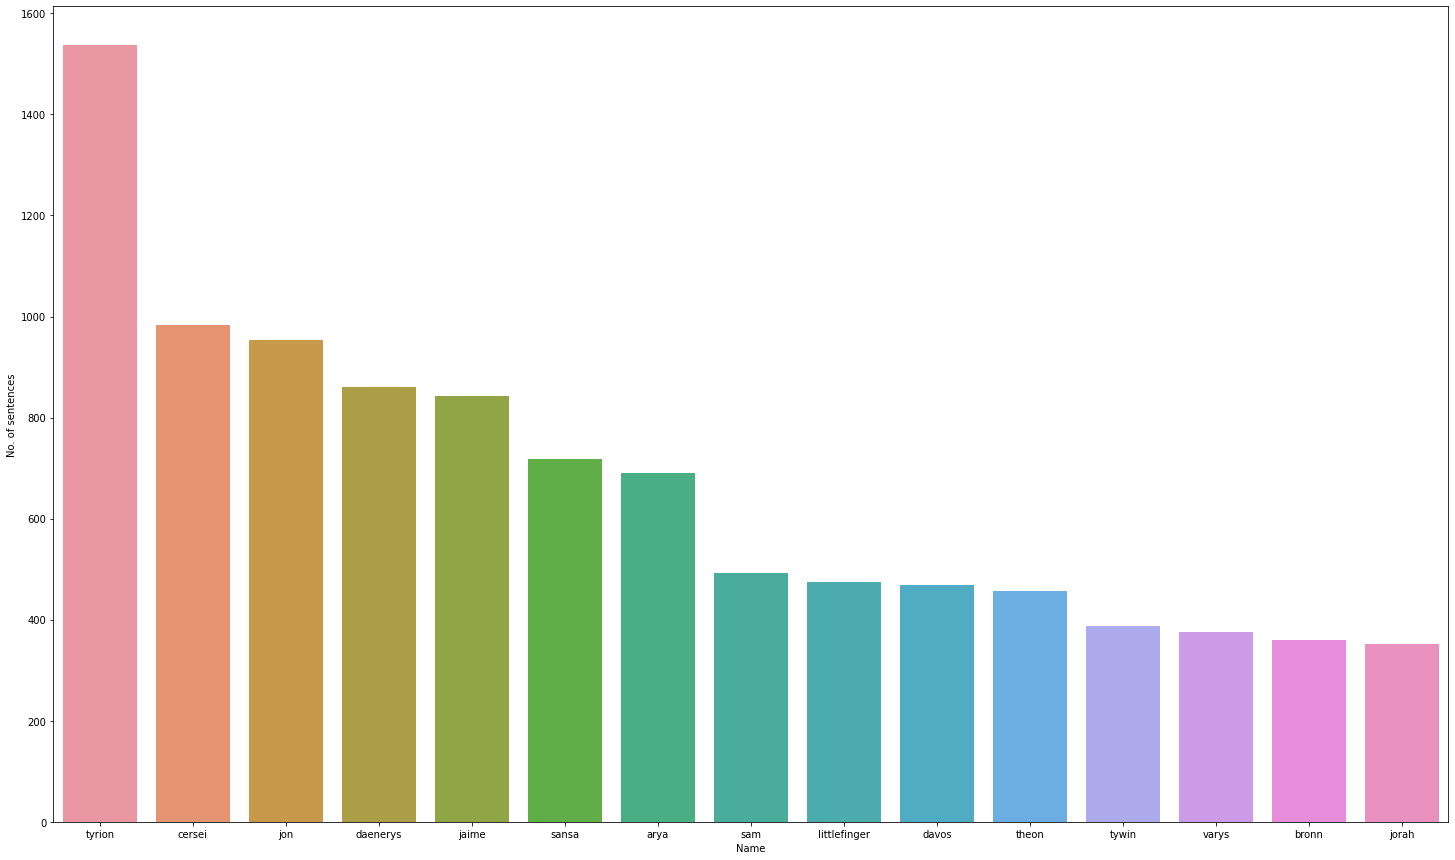

In [6]:
plt.figure(figsize = (25, 15))
sns.barplot(x=df.Name.value_counts().index[:15], y=df.Name.value_counts()[:15])
plt.xlabel('Name')
plt.ylabel('No. of sentences')

In [7]:
from wordcloud import WordCloud, STOPWORDS
import cv2
from PIL import Image

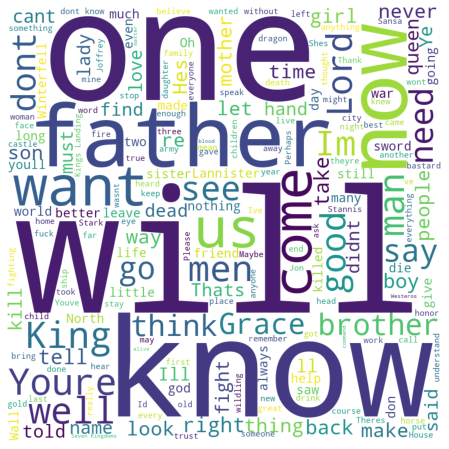

In [8]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.Sentence: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10)
wordcloud.generate(comment_words) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

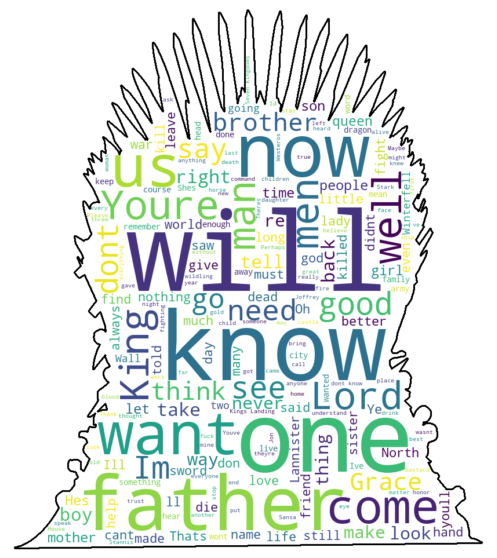

In [10]:
stopwords = set(STOPWORDS)

img = cv2.imread('/content/drive/My Drive/Projects/GOT/images/ironThrone.jpg')
ret,mask = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

wordcloud = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords, contour_width=2, contour_color='black')
wordcloud.generate(comment_words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()